In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
dataset=pd.read_csv("iris.csv")


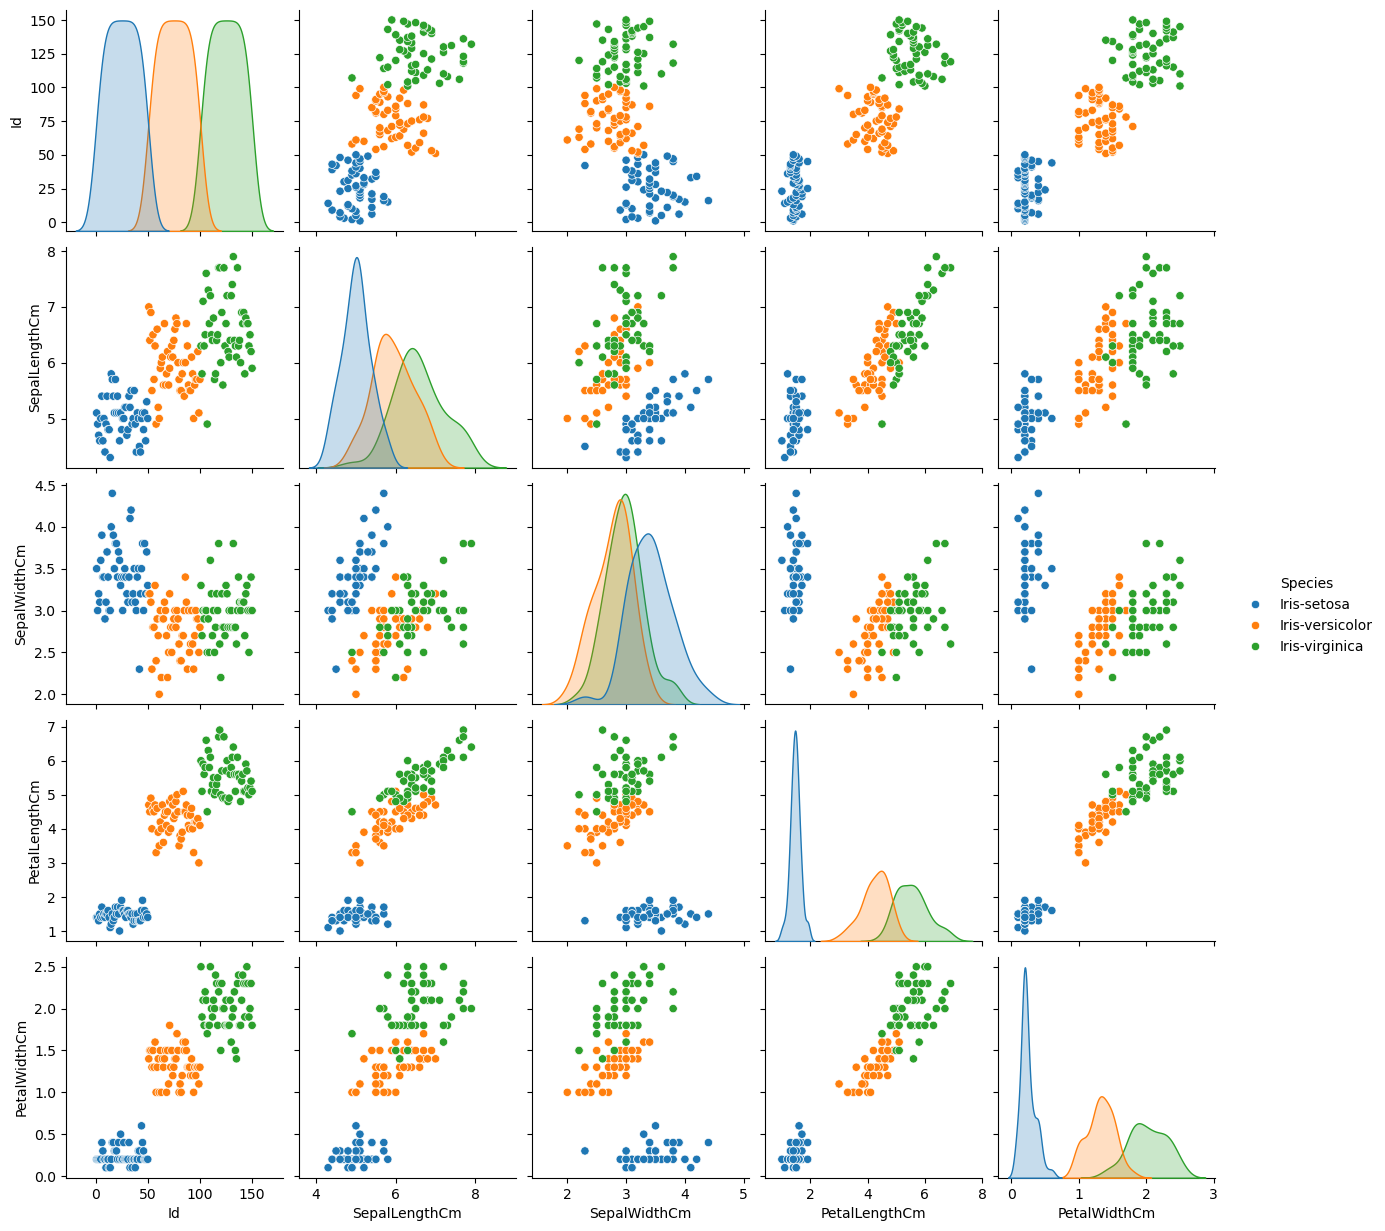

In [7]:
dataset["Species"].unique()
sns.pairplot(data=dataset,hue="Species")
plt.show()

In [11]:
x=dataset.iloc[:,1:-1]
y=dataset["Species"]

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [15]:
# OVR method
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(multi_class="ovr")
# by default this parameter is set to auto
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.9666666666666667

In [17]:
# multinomial method where softmax function is used
lr1=LogisticRegression(multi_class="multinomial")
lr1.fit(x_train,y_train)
lr1.score(x_test,y_test)

1.0

In [21]:
'''
# or directly we can, without changing parameters .As
it automatically detects that data belongs to which
category whether it is binary or multiclass ,okay!!
'''


'\n# or directly we can, without changing parameters .As\nit automatically detects that data belongs to which\ncategory whether it is binary or multiclass ,okay!!\n'

In [19]:

lr2=LogisticRegression()
lr2.fit(x_train,y_train)
lr2.score(x_test,y_test)

1.0

In [27]:
dataset.drop(columns=["Species"],inplace=True)

In [33]:
dataset.drop(columns=["Id"],inplace=True)

In [35]:
dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


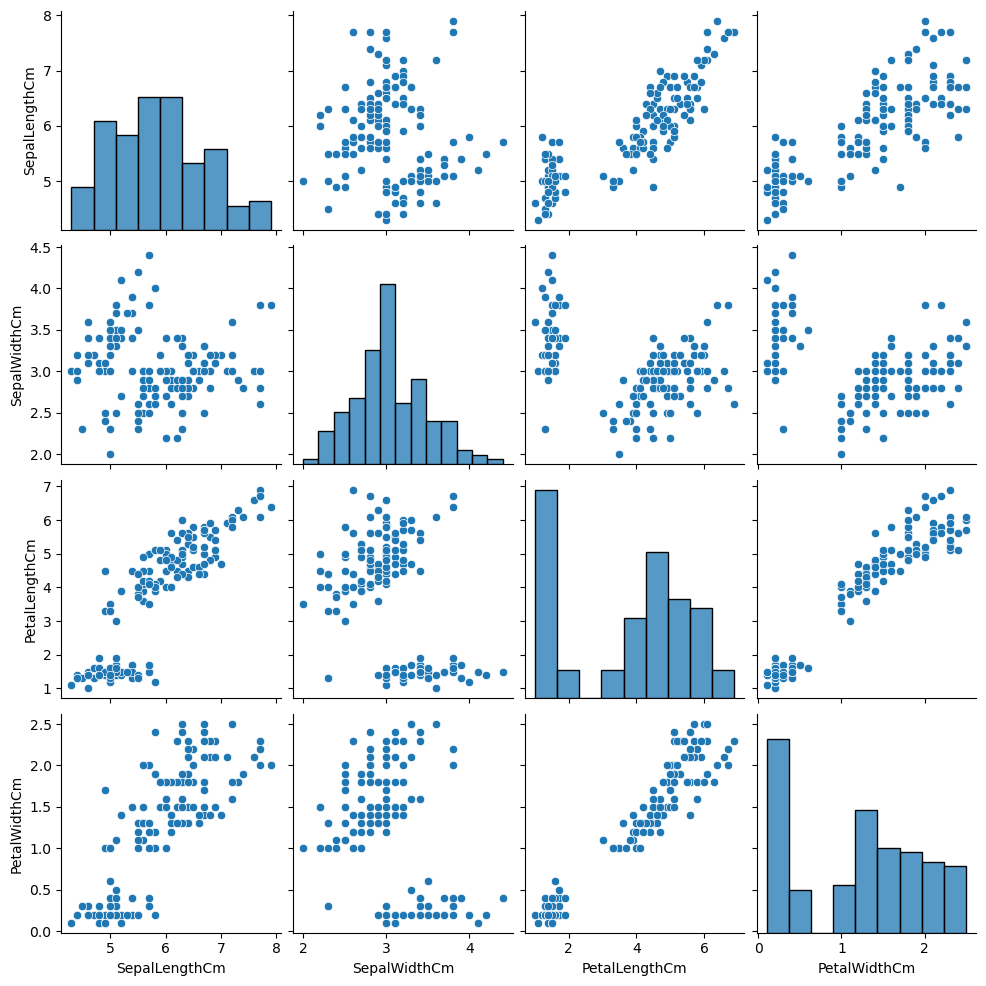

In [37]:
sns.pairplot(data=dataset)
plt.show()

In [39]:
#k-means is only when data is linearly separable
from sklearn.cluster import KMeans
wcss=[]

In [41]:
'''wcss (Within-Cluster Sum of Squares) is initialized
as an empty list.
# WCSS is a metric that measures the sum of squared
distances between data points and the centroid of
their respective clusters. It's a way to quantify how
tightly the data points in a cluster are grouped.'''


"wcss (Within-Cluster Sum of Squares) is initialized\nas an empty list.\n# WCSS is a metric that measures the sum of squared\ndistances between data points and the centroid of\ntheir respective clusters. It's a way to quantify how\ntightly the data points in a cluster are grouped."

In [45]:
for i in range(2,21):
    km=KMeans(n_clusters=i,init='k-means++')
    km.fit(dataset)
    wcss.append(km.inertia_)

C:\Users\divya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\divya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\divya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\divya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

In [47]:
'''
# km.inertia_ is a measure of the WCSS for the
clustering performed in the current iteration.
now we have value of wcss
'''

'\n# km.inertia_ is a measure of the WCSS for the\nclustering performed in the current iteration.\nnow we have value of wcss\n'

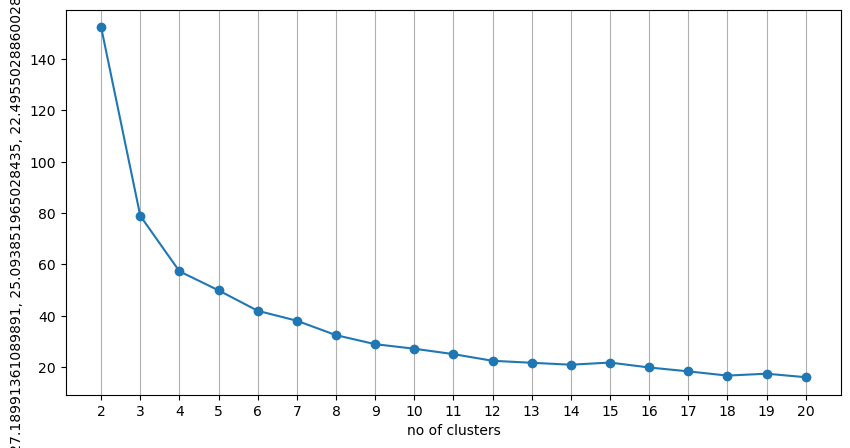

In [49]:
plt.figure(figsize=(10,5))
plt.plot([i for i in range(2,21)],wcss,marker='o')
plt.xlabel("no of clusters")
plt.xticks([i for i in range(2,21)])
plt.ylabel(wcss)
plt.grid(axis='x')
plt.show()

In [55]:
kmm=KMeans(n_clusters=3)
dataset["predict"]=kmm.fit_predict(dataset)
dataset


C:\Users\divya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,predict
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


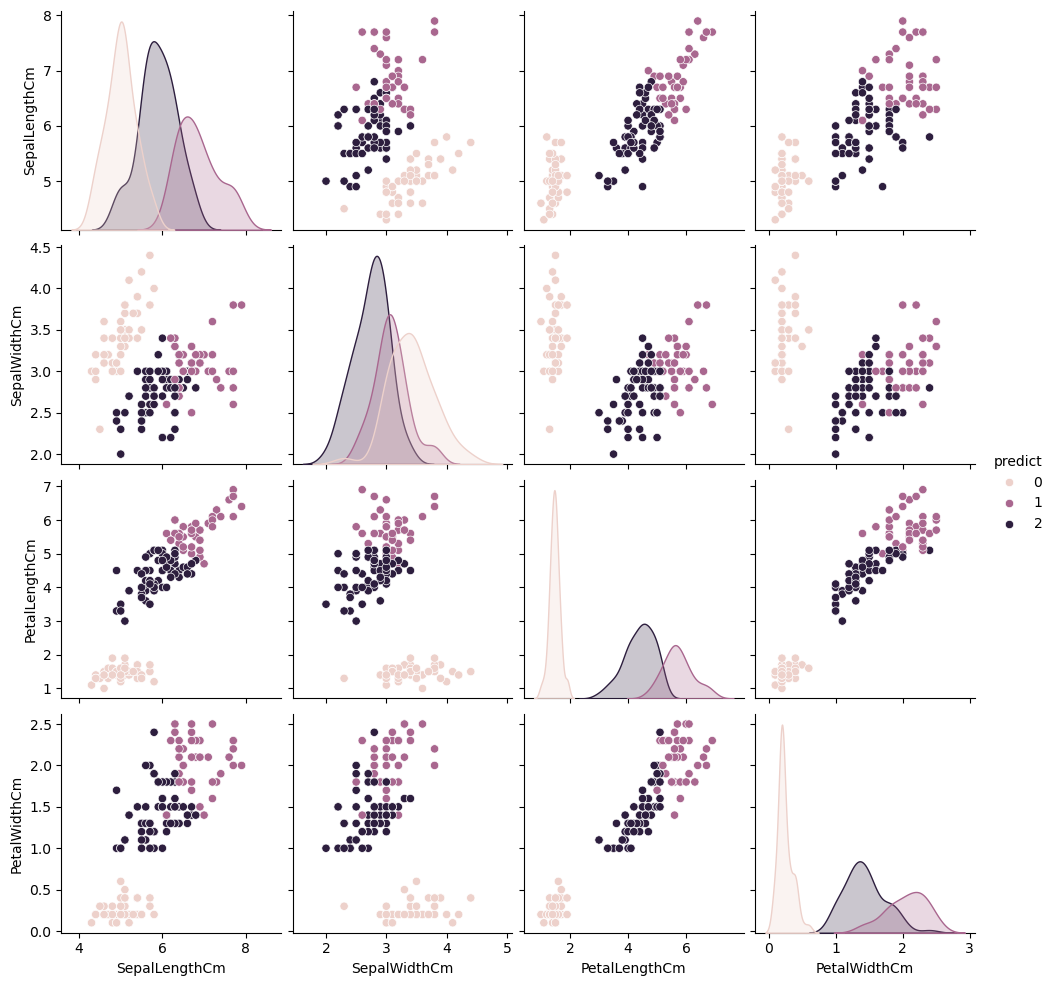

In [57]:
sns.pairplot (data=dataset,hue="predict")
plt.show()

In [59]:
# as per graph ,data is linearly separable
# to make dendrogram,install scipy library


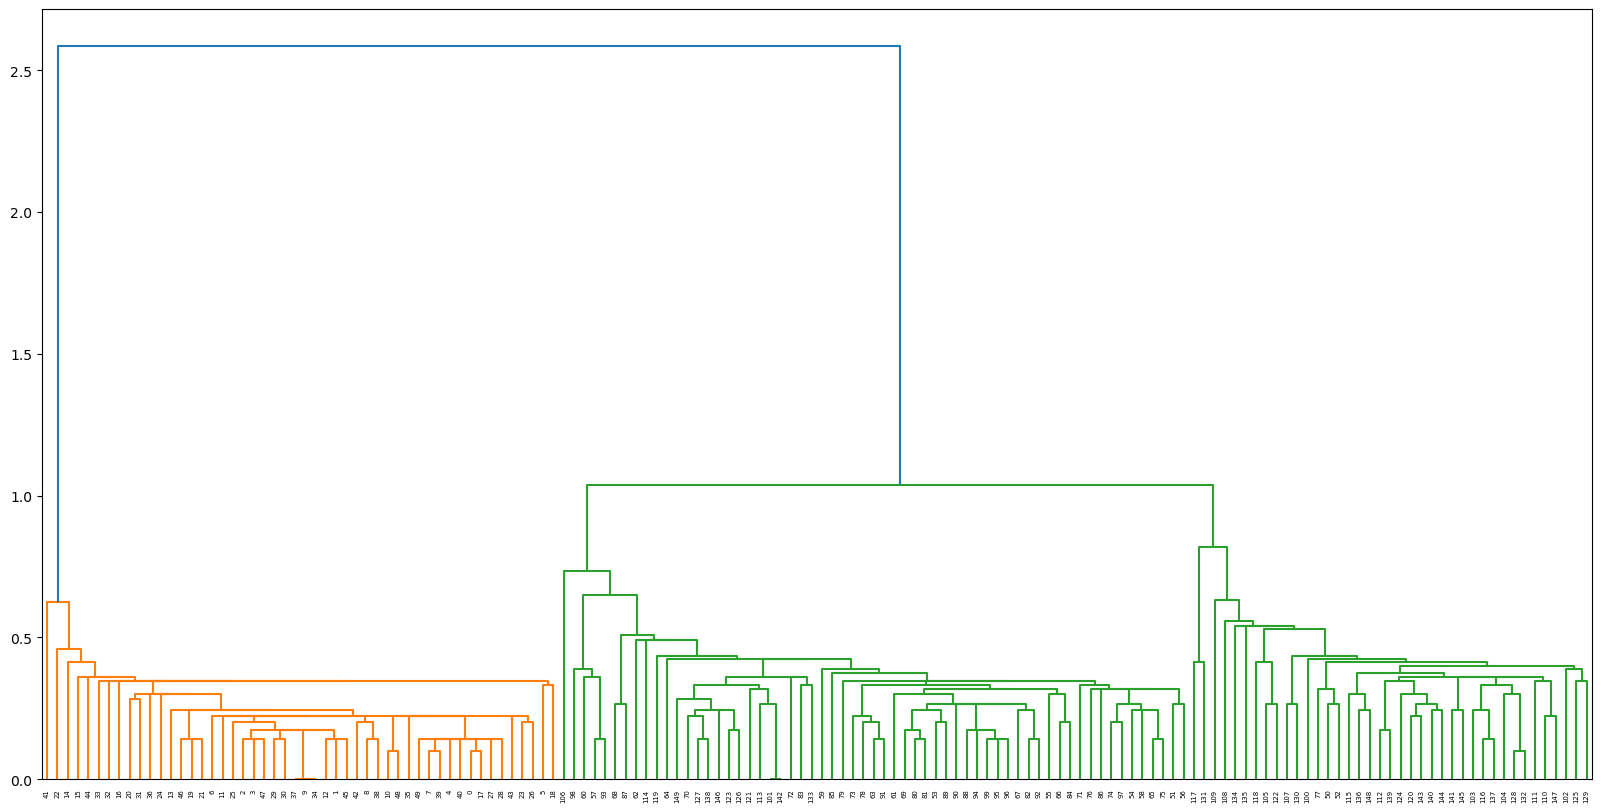

In [63]:
import scipy.cluster.hierarchy as sc
plt.figure(figsize=(20,10))
sc.dendrogram(sc.linkage(dataset,method='single',metric='euclidean'))
plt.show()

In [65]:
from sklearn.cluster import AgglomerativeClustering
ag=AgglomerativeClustering(n_clusters=2,linkage='single')
dataset["predict"]=ag.fit_predict(dataset)
dataset.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,predict
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1


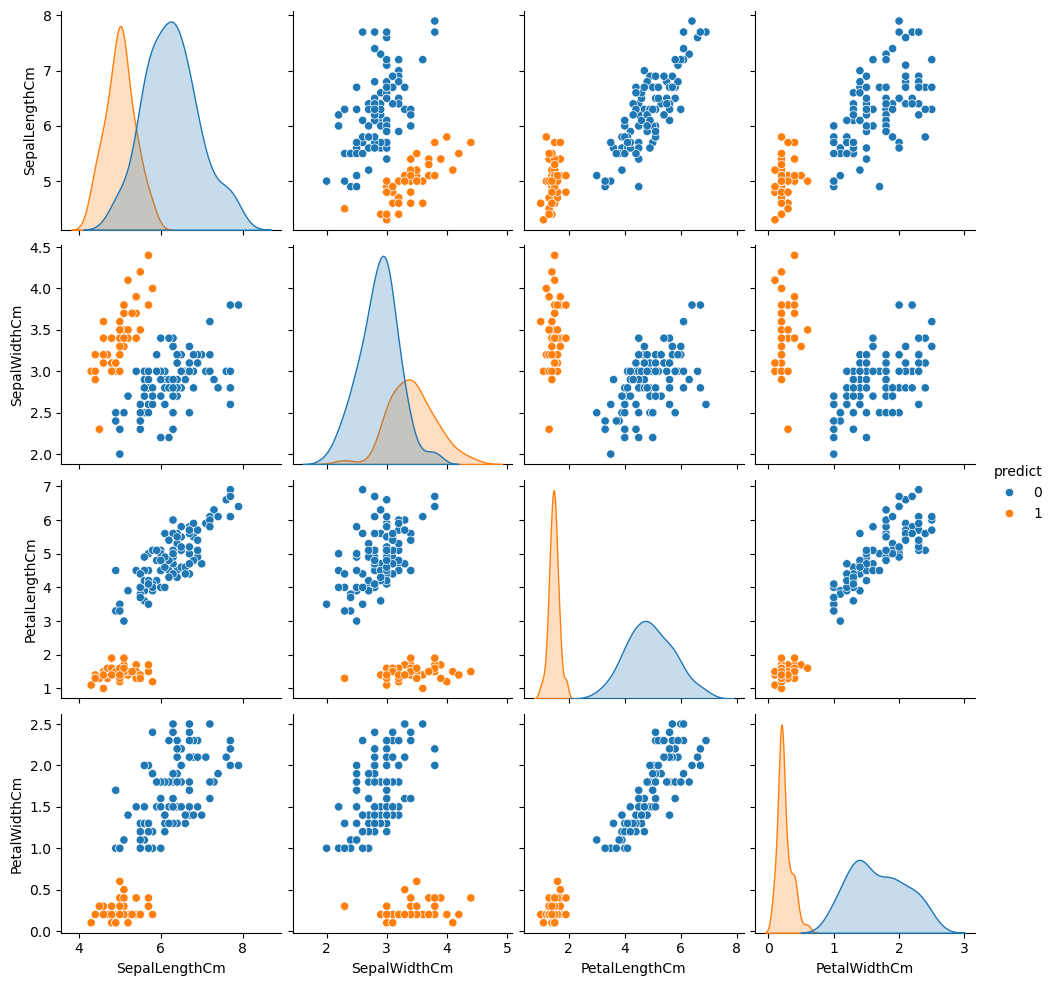

In [67]:
sns.pairplot(data=dataset,hue="predict")
plt.show()